# Crop Reccomendation

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

In [11]:
data=pd.read_csv("C:\\Users\\Armaan\\OneDrive\\Desktop\\WORKSPACE\\Machine_Learning\\Datasets\\farmAid\\cropReccomendation\\Crop_recommendation.csv",index_col=False)
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [12]:
labels=np.array(data.label)
labels=set(labels)
labels=list(labels)
labels=np.array(labels)

In [13]:
(labels)

array(['grapes', 'papaya', 'cotton', 'chickpea', 'lentil', 'pigeonpeas',
       'coffee', 'maize', 'rice', 'orange', 'jute', 'coconut',
       'blackgram', 'mungbean', 'mothbeans', 'banana', 'kidneybeans',
       'mango', 'watermelon', 'pomegranate', 'apple', 'muskmelon'],
      dtype='<U11')

In [14]:
def get_label(x):
    for i in range(len(labels)):
        if (labels[i]==x):
            return i

In [15]:
data.label=data.label.apply(lambda x:get_label(x))

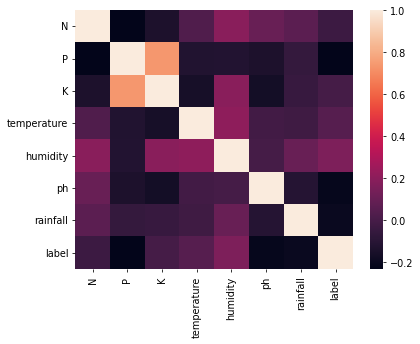

In [16]:
fig=plt.figure(dpi=70)
heatmap=sns.heatmap(data.corr())
plt.show()

In [17]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [23]:
# def fn(x):
#     return labels
d=x_test
d["label"]=y_test.apply(lambda x: labels[x])

In [24]:
d

,N,P,K,temperature,humidity,ph,rainfall,label
1320,105,14,50,26.214884,87.688398,6.419052,59.655908,watermelon
1367,91,12,46,24.644585,85.499382,6.343943,48.312190,watermelon
1291,14,121,203,9.724458,83.747656,6.158689,74.464111,grapes
264,52,73,79,17.257695,18.749440,7.840339,94.002872,chickpea
728,32,66,17,34.946616,65.267740,7.162358,70.141514,blackgram
...,...,...,...,...,...,...,...,...
1999,120,60,15,22.318719,83.861300,7.288377,65.357470,cotton
1171,9,21,32,32.269353,53.560928,5.870116,95.940354,mango
2136,84,27,29,23.322932,53.003663,7.167093,168.264429,coffee
1882,31,13,33,29.699523,95.212244,6.342464,148.300369,coconut


In [10]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [11]:
clf=svm.SVC(kernel='rbf')

In [12]:
clf.fit(x_train,y_train)

SVC()

In [13]:
y_pred=clf.predict(x_test)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.85      1.00      0.92        28
           2       1.00      0.85      0.92        27
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        27
           5       1.00      0.95      0.98        22
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        24
           9       0.94      1.00      0.97        17
          10       1.00      0.93      0.96        29
          11       1.00      1.00      1.00        24
          12       1.00      0.83      0.91        29
          13       0.95      1.00      0.98        21
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        24
          17       0.85    

In [15]:
print(confusion_matrix(y_test,y_pred))

[[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 27  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [16]:
import tensorflow as tf
# tf.keras.backend.set_floatx('float32')

In [17]:
np.array(x_train)[0].shape

(7,)

In [18]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[7],dtype=tf.float32),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(48,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(len(labels),activation="sigmoid")
])
model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.005),loss=tf.losses.CategoricalCrossentropy(),metrics=[tf.metrics.RootMeanSquaredError(),"accuracy"])

In [19]:
model.fit(x_train,tf.one_hot(y_train,depth=len(labels)),epochs=50)

Epoch 1/50
52/52 [==============================] - 2s 5ms/step - loss: 2.5197 - root_mean_squared_error: 0.5212 - accuracy: 0.4194
Epoch 2/50
52/52 [==============================] - 0s 5ms/step - loss: 0.8559 - root_mean_squared_error: 0.4526 - accuracy: 0.7152
Epoch 3/50
52/52 [==============================] - 0s 5ms/step - loss: 0.5465 - root_mean_squared_error: 0.4019 - accuracy: 0.8121
Epoch 4/50
52/52 [==============================] - 0s 5ms/step - loss: 0.4267 - root_mean_squared_error: 0.3672 - accuracy: 0.8436
Epoch 5/50
52/52 [==============================] - 1s 20ms/step - loss: 0.3745 - root_mean_squared_error: 0.3331 - accuracy: 0.8612
Epoch 6/50
52/52 [==============================] - 0s 7ms/step - loss: 0.3593 - root_mean_squared_error: 0.3040 - accuracy: 0.8764
Epoch 7/50
52/52 [==============================] - 0s 6ms/step - loss: 0.3232 - root_mean_squared_error: 0.2801 - accuracy: 0.8994
Epoch 8/50
52/52 [==============================] - 0s 5ms/step - loss: 0.3

In [20]:
model.evaluate(x_test,tf.one_hot(y_test,depth=len(labels)))

18/18 [==============================] - 0s 4ms/step - loss: 0.3498 - root_mean_squared_error: 0.1299 - accuracy: 0.9091


[0.3498033881187439, 0.1299189031124115, 0.9090909361839294]

In [21]:
y_pred=tf.argmax(model.predict(x_test),axis=1)

18/18 [==============================] - 0s 1ms/step


In [22]:
model.predict(np.array(x_test)[0][np.newaxis,:]).sum()

1/1 [==============================] - 0s 54ms/step


0.9999832

In [23]:
np.array(x_test)[0],labels[np.array(y_test)[0]]

(array([105.        ,  14.        ,  50.        ,  26.2148837 ,
         87.6883982 ,   6.41905219,  59.65590798]),
 'watermelon')

In [24]:
print(confusion_matrix(y_test,y_pred))

[[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  5  0  1  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0 19  0  0  0  0  2  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 17  0  0  7  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [25]:
# model.save("cR.h5")

In [26]:
# model2=tf.keras.models.load_model("cR.h5")

In [27]:
# y_pred=tf.argmax(model2.predict(x_test),axis=1)
# print(confusion_matrix(y_test,y_pred))

In [28]:
# import tensorflowjs as tfjs

In [29]:
# tfjs.converters.save_keras_model(model,"./Model/")

In [30]:
# a=[1,2,0]
# tf.one_hot(a,3)